### Setup

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, whiten, vq
from scipy.spatial.distance import cdist

In [58]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [59]:
undata = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/curric-data-001-data-sets/master/un/un.csv')
undata.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
undata.count()

country                   207
region                    207
tfr                       197
contraception             144
educationMale              76
educationFemale            76
lifeMale                  196
lifeFemale                196
infantMortality           201
GDPperCapita              197
economicActivityMale      165
economicActivityFemale    165
illiteracyMale            160
illiteracyFemale          160
dtype: int64

### Get columns of interest

In [78]:
xdata = undata[['lifeMale', 'lifeFemale', 'infantMortality', 'GDPperCapita']]
xdata.dropna(inplace = True)
x = xdata #.iloc[:,0:3]
print(x.head())

   lifeMale  lifeFemale  infantMortality  GDPperCapita
0      45.0        46.0            154.0        2848.0
1      68.0        74.0             32.0         863.0
2      67.5        70.3             44.0        1531.0
5      44.9        48.1            124.0         355.0
7      69.6        76.8             22.0        8055.0


### Find optimal number of clusters based on Avg within Sum of Squares 

In [79]:
x = whiten(x)  # Standardize
K = range(1,10)

KM = [kmeans(x,k) for k in K]  # Kmeans for data for 1 to 9 clusters
centroids = [cent for (cent,var) in KM]   # Get cluster centroids

In [80]:
# Get the euclidean distance from centroids for each data point using cdist
D_k = [cdist(x, cent, 'euclidean') for cent in centroids]  
cIdx = [np.argmin(D,axis=1) for D in D_k]  # closest Cluster location 
dist = [np.min(D,axis=1) for D in D_k]  # min cluster distance
avgWithinSS = [sum(d)/x.shape[0] for d in dist]  # Avg within cluster sum of squares

### Make elbow plot to find optimal number of clusters graphically

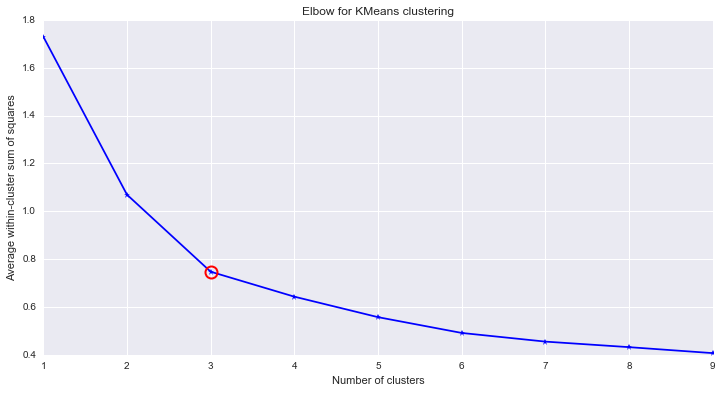

In [82]:
kIdx = 2

# elbow curve
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')  # Plot number of clusters and sum of squares
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')  # Mark 3rd cluster as point of interest
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

### Male Life Expectancy vs GDPperCapita clustered into 3 groups

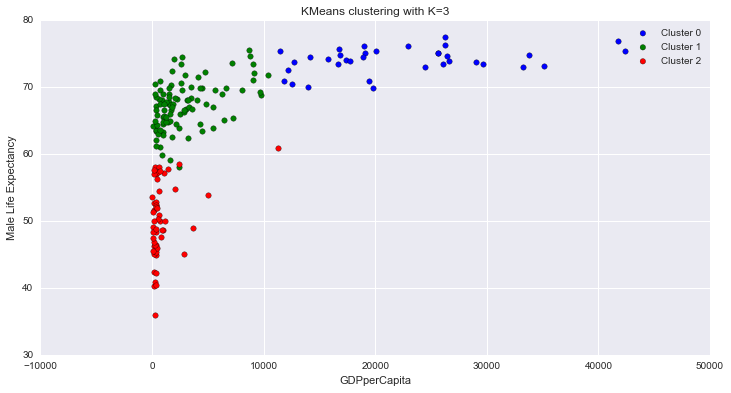

In [83]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(xdata[['GDPperCapita']][ind],xdata[['lifeMale']][ind], s=30, c=clr[i], label='Cluster %d'%i)

plt.xlabel('GDPperCapita')
plt.ylabel('Male Life Expectancy')
plt.title('KMeans clustering with K=%d' % K[kIdx])
plt.legend()

plt.show()

### Female Life Expectancy vs GDPperCapita clustered into 3 groups

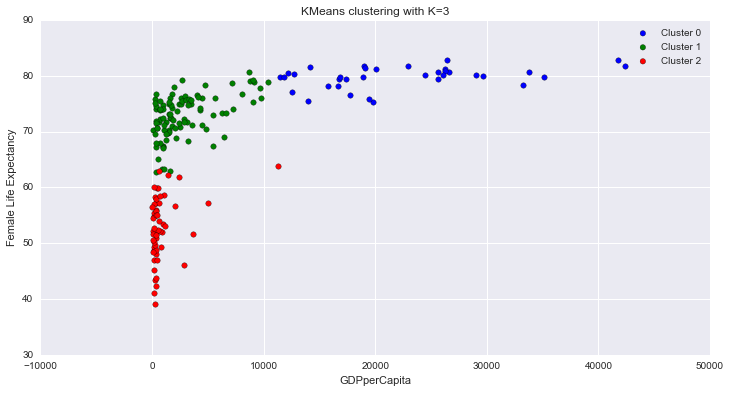

In [84]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(xdata[['GDPperCapita']][ind],xdata[['lifeFemale']][ind], s=30, c=clr[i], label='Cluster %d'%i)

plt.xlabel('GDPperCapita')
plt.ylabel('Female Life Expectancy')
plt.title('KMeans clustering with K=%d' % K[kIdx])
plt.legend()

plt.show()

### Infant Mortality per 1000 vs GDPperCapita clustered into 3 groups

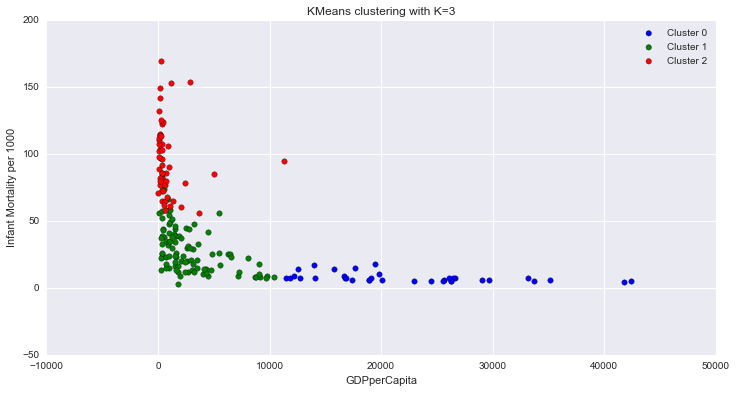

In [85]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(xdata[['GDPperCapita']][ind],xdata[['infantMortality']][ind], s=30, c=clr[i], label='Cluster %d'%i)

plt.xlabel('GDPperCapita')
plt.ylabel('Infant Mortality per 1000')
plt.title('KMeans clustering with K=%d' % K[kIdx])
plt.legend()

plt.show()